In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Numerisk løsning af TUSL

Den tidsuafhængige schrödingerligning i én dimension:
\begin{align}
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi &= E\psi\\
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}&=\big(E-V(x)\big)\psi
\end{align}


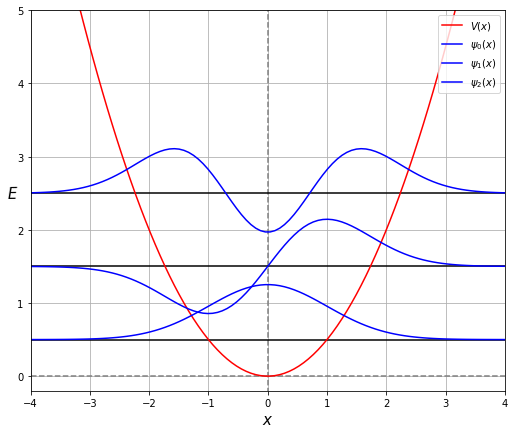

In [4]:
## Plotter grundtilstanden & harmonisk oscillatorpotentialet med h=m=w=1 ##
w, m, h_bar = 1, 1, 1 
vx = np.linspace(-4,4,100)
fig, ax = plt.subplots(figsize=(8.5,7))
def E_n(n,h,w):
    return h*w*(n+1/2)
def potential(x,w,m):
    return (1/2)*m*(w*x)**2
def psi0(x,w,m,h):
    return ((m*w)/(np.pi*h))**(1/4)*np.exp(-((m*w)/(2*h))*x**2)
def psi1(x,w,m,h):
    return((m*w)/(np.pi*h))**(1/4)*np.sqrt((2*m*w)/h)*x*np.exp(-((m*w)/(2*h))*x**2)
def psi2(x,w,m,h):
    return 1/(np.sqrt(2))*((m*w)/(np.pi*h))**(1/4)*(((2*m*w)/h)*x**2-1)*np.exp(-((m*w)/(2*h))*x**2)
ax.plot(vx,potential(vx,m,w),color = 'red',label=r'$V(x)$')
ax.plot(vx,psi0(vx,w,m,h_bar)+E_n(0,h_bar,omega),label = r'$\psi_0(x)$',color='blue')
ax.plot(vx,psi1(vx,w,m,h_bar)+E_n(1,h_bar,omega),label = r'$\psi_1(x)$',color='blue')
ax.plot(vx,psi2(vx,w,m,h_bar)+E_n(2,h_bar,omega),label = r'$\psi_2(x)$',color='blue')

ax.hlines(0,-4,4,ls='--',color='grey'), ax.vlines(0,-1,5,ls='--',color='grey')
ax.hlines(E_n(0,h_bar,omega),-4,4),ax.hlines(E_n(1,h_bar,omega),-4,4)
ax.hlines(E_n(2,h_bar,omega),-4,4)
ax.set_xlim(-4,4),ax.set_ylim(-0.2,5), ax.set_xlabel(r'$x$', size=15)
ax.set_ylabel(r'$E$',size=15,rotation=1), ax.grid(), ax.legend(loc=1,fontsize=10)
#ax.hlines(E_n(0,h_bar,w),-5,5,)
plt.show()

Dette gøres ved at anvende den matematisk approksimation på den 2 afledte af en funktion, som den afledte af en symmetrisk differentialkvotient, hvoraf det fåes:

\begin{equation}
\frac{d^2\psi}{dx^2}\approx\frac{\psi_{n+1}+\psi_{n-1}-2\psi_n}{(\Delta x)^2}
\end{equation}

hvoraf vi skrives TUSL som:
\begin{align}
-\frac{\hbar^2}{2m}\bigg(\frac{\psi_{n+1}+\psi_{n-1}-2\psi_n}{(\Delta x)^2}\bigg)& \approx(E-V_n)\psi_n
\end{align}

og udtrykke $\psi_{n+1}$ som funktion af $\psi_{n-1}$ og $\psi_n$:

\begin{equation}
\psi_{n+1}=2\psi_n-\psi_{n-1}-2(\Delta x)^2(E-V_n)\psi_n
\end{equation}


## Harmonisk oscillator potentialet:

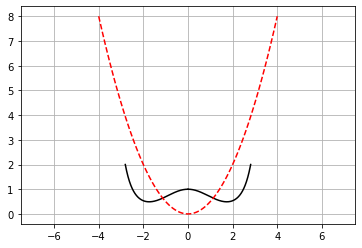

In [5]:
## Konstanter ##
m_elektron = 1     
h_bar      = 1    
omega      = 1


## Startbetingelser ##
step_size = 1e-4
Nr_steps = int(1e6)
## De lige løsninger ##
even_E = [1/2,5/2,9/2,13/2,17/2]*h_bar*omega
E_init = 0.4*h_bar*omega


psi_minus1, psi_0 = 1,1

cut_off = 2

xs = np.linspace(0,Nr_steps*step_size,Nr_steps+1)
def V_n1(x,m,w):
    return (1/2)*m*(w*x)**2

def psi_n_plus1(psi_n_minus1,psi_n,v_n,E,delta_x):
    return 2*psi_n-psi_n_minus1-2*(E-v_n)*delta_x**2*psi_n
    
psi_list = [psi_minus1,psi_0]
for i in range(Nr_steps-1):
    v_n = V_n1(xs[i],m_elektron,omega)
    psi_init = psi_list[i]
    psi_n = psi_list[i+1]
    psi_plus1 = psi_n_plus1(psi_list[i],psi_list[i+1],v_n,E_init,step_size)
    if abs(psi_plus1) > cut_off:
        ## Bølgefunktionen divergerer ##
        break
    psi_list.append(psi_plus1)
    
x_plot = xs[:len(psi_list)]
plt.plot(x_plot,psi_list,color='black'),
plt.plot(-np.flip(x_plot),np.flip(psi_list),color='black')
plt.xlim(-7.5,7.5), plt.grid()
plt.plot(vx,potential(vx,m,w),color='red',ls='--')

(Text(0.5, 0, '$Nr. iteration $'), Text(0, 0.5, '$E$'))

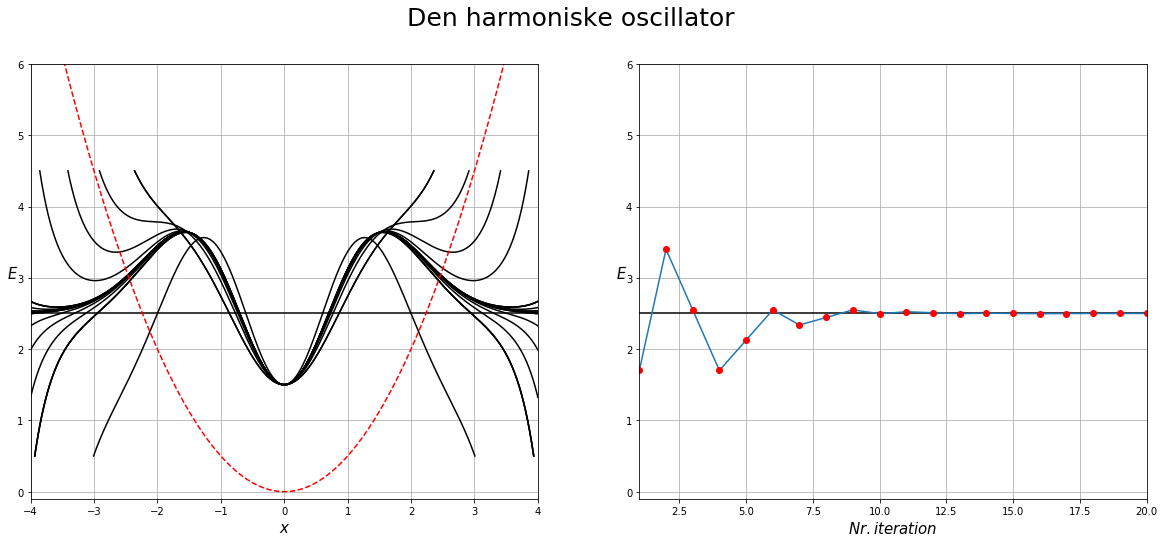

In [11]:
#### Finder den første bølgefunktion og det tilhørende energiniveau der ligger over startgættet #####
fig, ax = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Den harmoniske oscillator', fontsize=25)
## Konstanter ##
m_elektron = 1     
h_bar      = 1    
omega      = 1


##### Simuleringsindstillinger #####
step_size = 1e-4         # Skridtstørrelse
Nr_steps = int(1e6)      # Antal skridt
cut_off = 2              # Divergensgrænse
E_tol = 0.00001          # Tolerance på ændring i energien
Nr_iterations = 20       # Maksimalt antal iterationer
xs = np.linspace(0,Nr_steps*step_size,Nr_steps+1)


##### Startbetingelser #####
E_init = 1.7*h_bar*omega           # Startgæt på energi
#psi_minus1, psi_0 = 0, step_size   # Ulige løsning 
psi_minus1, psi_0 = -1, -1           # Lige løsning - skiftevis 1,1 & -1,-1 


E_vals = []        # Værdierne af energien
delta_E = E_init   # Værdi der lægges til energien pr. iteration

##### Starter simulering #####
for k in range(Nr_iterations):
    E_vals.append(E_init)           # Lægger den nuværende værdi af energien i listen      
    psi_list = [psi_minus1,psi_0]   # Initialiserer listen af y-værdier for bølgefunktionen og tilføjer startbetingelser
    
    ## Beregner bølgefunktionen for den nuværende energi ##
    for i in range(Nr_steps-1):
        v_n = V_n1(xs[i],m_elektron,omega)                                        # Beregner potentialet i den givne x-værdi
        psi_plus1 = psi_n_plus1(psi_list[i],psi_list[i+1],v_n,E_init,step_size)  # Beregner den næste y-værdi af bølgefunktionen
       
        ## Tjekker om værdien af bølgefunktionen er vokset så meget af den antages divergerende ##
        if abs(psi_plus1) > cut_off:
            break ## Bølgefunktionen divergerer og der brydes ud af for-loopet over 'i'.

        psi_list.append(psi_plus1)  # Den beregnede y-værdi af bølgefunktionen lægges ind i listen
        
    ## Ved den allerførste iteration sættes variablen for hvilken vej bølgefunktionen divergerer ##
    if k == 0:
        last_diverge = np.sign(psi_list[-1]) ## Sætter variablen = fortegnet*1
        
    ## Hvis fortegnet på den sidste værdi i listen ikke matcher variablens har divergensen skiftet retning, ##
    ## og vi er gået forbi løsningen ##
    if np.sign(psi_list[-1]) != np.sign(last_diverge):
        last_diverge *= -1       # Skifter fortegn på variablen
        delta_E = delta_E/2      # Halverer den værdi der skal lægges til gættet på energien
        delta_E *= -1            # Skifter fortegn på den værdi der skal lægges til gættet på energien
        
        ## Hvis den værdi der skal lægges til energien er blevet lille nok er vi kommet tæt på den rigtige ##
        if abs(delta_E) < E_tol:
            print('Løsning fundet')
            break
    E_init += delta_E   # Lægger
    x_plot = xs[:len(psi_list)]
    ax[0].plot(x_plot,np.array(psi_list)+E_n(2,h_bar,omega),color='black'),
    ax[0].plot(-np.flip(x_plot),np.flip(psi_list)+E_n(2,h_bar,omega),color='black') 


##### Plotter den funde bølgefunktion og det fundne energiniveau ##### 

x_plot = xs[:len(psi_list)]
ax[0].plot(x_plot,np.array(psi_list)+E_n(2,h_bar,omega),color='black'),
ax[0].plot(-np.flip(x_plot),np.flip(psi_list)+E_n(2,h_bar,omega),color='black')    # For lige løsning
#ax[0].plot(-np.flip(x_plot),-np.flip(psi_list)+E_n(1,h_bar,omega),color='black')    # For ulige løsning

ax[0].set_xlim(-4,4), ax[0].grid(), ax[0].plot(vx,potential(vx,m,w),color='red',ls='--'), ax[0].hlines(E_vals[-1],-4,4)
ax[0].set_xlabel(r'$x$', size=15), ax[0].set_ylabel(r'$E$', size=15,rotation=1), ax[0].set_ylim(-0.1,6)
Ex = np.arange(1,len(E_vals)+1)
ax[1].plot(Ex,E_vals), ax[1].grid(), ax[1].hlines(E_vals[-1],1,len(E_vals)), ax[1].set_xlim(1,len(E_vals))
ax[1].plot(Ex,E_vals,'o',color = 'red'), ax[1].set_ylim(-0.1,6)
ax[1].set_xlabel(r'$Nr. iteration $', size=15), ax[1].set_ylabel(r'$E$', size=15,rotation=1)


## Den endelige brønd potentialet

(Text(0.5, 0, '$Nr. iteration $'), Text(0, 0.5, '$E$'))

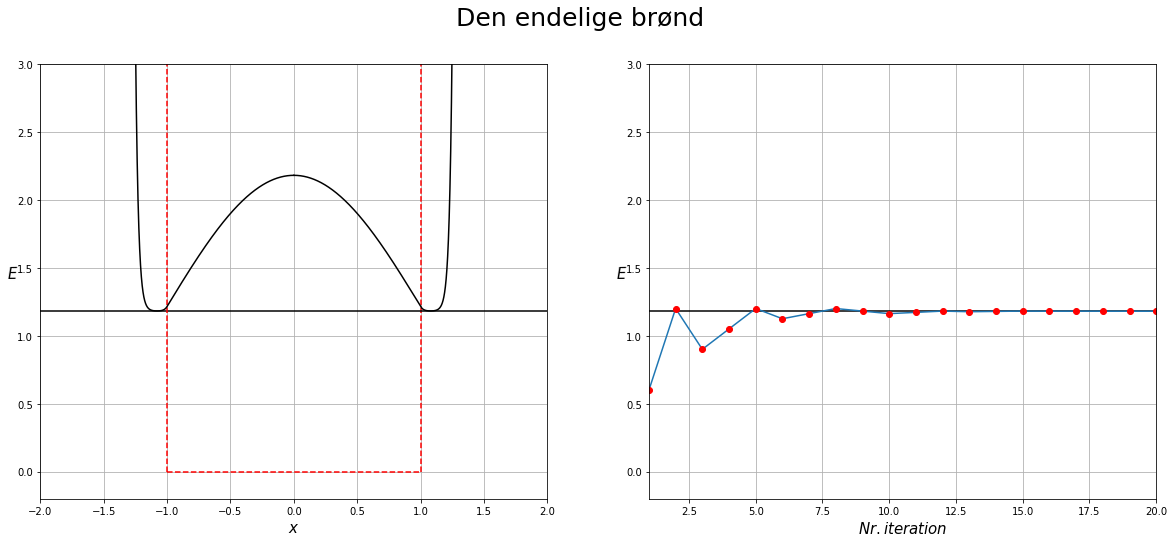

In [187]:
def V_n(x,a,V1, V2):
    potential = V2
    if x < a:
        potential = V1
    return potential

def psi_n_plus1(psi_n_minus1,psi_n,v_n,E,delta_x):
    return 2*psi_n-psi_n_minus1-2*(E-v_n)*delta_x**2*psi_n

#### Finder den første bølgefunktion og det tilhørende energiniveau der ligger over startgættet #####

## Konstanter ##
m_elektron = 1     
h_bar      = 1    
omega      = 1


##### Simuleringsindstillinger #####
step_size = 1e-4         # Skridtstørrelse
Nr_steps = int(1e6)      # Antal skridt
cut_off = 2              # Divergensgrænse
E_tol = 0.00001          # Tolerance på ændring i energien
Nr_iterations = 20       # Maksimalt antal iterationer
xs = np.linspace(0,Nr_steps*step_size,Nr_steps+1)


##### Startbetingelser #####
well_width = 1                     # Bredden på brønden
V_inside = 0                       # Potentialet i brønden
V_outside = 1000                   # Potentiale udenfor brønden
E_init = 0.6*h_bar*omega           # Startgæt på energi
#psi_minus1, psi_0 = 0, step_size  # Ulige løsning 
psi_minus1, psi_0 = 1, 1           # Lige løsning - skiftevis 1,1 & -1,-1 


E_vals = []        # Værdierne af energien
delta_E = E_init   # Værdi der lægges til energien pr. iteration

##### Starter simulering #####
for k in range(Nr_iterations):
    E_vals.append(E_init)           # Lægger den nuværende værdi af energien i listen      
    psi_list = [psi_minus1,psi_0]   # Initialiserer listen af y-værdier for bølgefunktionen og tilføjer startbetingelser
    
    ## Beregner bølgefunktionen for den nuværende energi ##
    for i in range(Nr_steps-1):
        v_n = V_n(xs[i],well_width,V_inside,V_outside)                           # Beregner potentialet i den givne x-værdi
        psi_plus1 = psi_n_plus1(psi_list[i],psi_list[i+1],v_n,E_init,step_size)  # Beregner den næste y-værdi af bølgefunktionen
       
        ## Tjekker om værdien af bølgefunktionen er vokset så meget af den antages divergerende ##
        if abs(psi_plus1) > cut_off:
            break ## Bølgefunktionen divergerer og der brydes ud af for-loopet over 'i'.

        psi_list.append(psi_plus1)  # Den beregnede y-værdi af bølgefunktionen lægges ind i listen
        
    ## Ved den allerførste iteration sættes variablen for hvilken vej bølgefunktionen divergerer ##
    if k == 0:
        last_diverge = np.sign(psi_list[-1]) ## Sætter variablen = fortegnet*1
        
    ## Hvis fortegnet på den sidste værdi i listen ikke matcher variablens har divergensen skiftet retning, ##
    ## og vi er gået forbi løsningen ##
    if np.sign(psi_list[-1]) != np.sign(last_diverge):
        last_diverge *= -1       # Skifter fortegn på variablen
        delta_E = delta_E/2      # Halverer den værdi der skal lægges til gættet på energien
        delta_E *= -1            # Skifter fortegn på den værdi der skal lægges til gættet på energien
        
        ## Hvis den værdi der skal lægges til energien er blevet lille nok er vi kommet tæt på den rigtige ##
        if abs(delta_E) < E_tol:
            print('Løsning fundet')
            break
    E_init += delta_E   # Lægger


##### Plotter den funde bølgefunktion og det fundne energiniveau ##### 
fig, ax = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Den endelige brønd', fontsize=25)
x_plot = xs[:len(psi_list)]
ax[0].plot(x_plot,np.array(psi_list)+E_vals[-1],color='black'),
ax[0].plot(-np.flip(x_plot),np.flip(psi_list)+E_vals[-1],color='black')    # For lige løsning
#ax[0].plot(-np.flip(x_plot),-np.flip(psi_list)+E_n(2,h_bar,omega),color='black')    # For ulige løsning

ax[0].set_xlim(-2,2), ax[0].grid(), ax[0].vlines(1,V_inside,V_outside,color='red',ls='--'), ax[0].hlines(E_vals[-1],-4,4)
ax[0].set_xlabel(r'$x$', size=15), ax[0].set_ylabel(r'$E$', size=15,rotation=1), ax[0].set_ylim(-0.2,3)
ax[0].vlines(-1,V_inside,V_outside,color='red',ls='--'),ax[0].hlines(0,-1,1,color='red',ls='--')
Ex = np.arange(1,len(E_vals)+1)
ax[1].plot(Ex,E_vals), ax[1].grid(), ax[1].hlines(E_vals[-1],1,len(E_vals)), ax[1].set_xlim(1,len(E_vals))
ax[1].plot(Ex,E_vals,'o',color = 'red'), ax[1].set_ylim(-0.2,3)
ax[1].set_xlabel(r'$Nr. iteration $', size=15), ax[1].set_ylabel(r'$E$', size=15,rotation=1)
